# Deuda externa

El objetivo de este análisis es analizar la evolución de la deuda externa de Argentina durante los gobiernos de Cristina Fernández de Kirchner y Mauricio Macri (hasta 2017, donde figuran los datos oficiales a la fecha de consulta de este dataset), con el fin de comprender la composición de esa deuda tanto en términos nominales como en porcentaje del PBI.

*Fuentes*
* [Deuda externa](https://datos.gob.ar/dataset/sspm-deuda-externa-privada---bcra/archivo/sspm_313.1)

## Importación de librerías a utilizar en el análisis

Utilizaremos Pandas para trabajar sobre el dataset en forma de objeto DataFrame, NumPy para realizar posibles operaciones matemáticas entre arrays, Matplotlib y Seaborn como herramientas de visualización, y DateTime y Matplotlib.Dates para trabajar con series de tiempo.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

Cargamos el dataset en un objeto DataFrame, indicando la columna de índice tiempo como index. Vemos la información general para identificar el tipo de datos para trabajar, en este caso float64, que indica que están en valores numéricos de punto flotante (adecuados para trabajar cantidades). Luego, imprimimos las dimensiones del dataset, la cantidad de valores nulos y observamos las primeras y últimas 10 filas para tener una noción inicial de su contenido.

In [17]:
df = pd.read_csv('deuda-externa-privada-bcra.csv', index_col='indice_tiempo')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2001-10-01 to 2017-07-01
Data columns (total 22 columns):
total                                                         63 non-null float64
por_categoria_deuda_comercial                                 63 non-null float64
anticipos_prefinanciacion_bienes                              63 non-null float64
deuda_por_importacion_bienes                                  63 non-null float64
deuda_comercial_servicios                                     63 non-null float64
deuda_comercial_lineas_credito                                63 non-null float64
por_categoria_deuda_financiera                                63 non-null float64
deuda_financiera_prestamos_financieros                        63 non-null float64
prestamos_financieros_titulos_deuda                           63 non-null float64
deuda_financiera_por_utilidades_dividendos                    63 non-null float64
deuda_financiera_linea_credito_financiera                     63 

In [19]:
print("Dimensiones del dataset" + ": " + str(df.shape))

Dimensiones del dataset: (64, 22)


In [20]:
for col in df.columns:
    print(col + " " + str(df[col].isna().sum()))

total 1
por_categoria_deuda_comercial 1
anticipos_prefinanciacion_bienes 1
deuda_por_importacion_bienes 1
deuda_comercial_servicios 1
deuda_comercial_lineas_credito 1
por_categoria_deuda_financiera 1
deuda_financiera_prestamos_financieros 1
prestamos_financieros_titulos_deuda 1
deuda_financiera_por_utilidades_dividendos 1
deuda_financiera_linea_credito_financiera 1
deuda_financiera_otras_deudas 1
por_acreedor_clientes_del_exterior 1
por_acreedor_proveedores_del_exterior 1
por_acreedor_empresas_del_mismo_grupo 1
por_acreedor_entidades_financieras_internacionales 1
por_acreedor_multiples_tenedores_titulos 1
por_acreedor_organismos_internacionales_agencias_oficiales 1
por_acreedor_otros 1
en_porcentaje_del_pib 1
en_porcentaje_rrii 5
en_porcentaje_las_exportaciones 19


In [21]:
df.head(10)

,total,por_categoria_deuda_comercial,anticipos_prefinanciacion_bienes,deuda_por_importacion_bienes,deuda_comercial_servicios,deuda_comercial_lineas_credito,por_categoria_deuda_financiera,deuda_financiera_prestamos_financieros,prestamos_financieros_titulos_deuda,deuda_financiera_por_utilidades_dividendos,...,por_acreedor_clientes_del_exterior,por_acreedor_proveedores_del_exterior,por_acreedor_empresas_del_mismo_grupo,por_acreedor_entidades_financieras_internacionales,por_acreedor_multiples_tenedores_titulos,por_acreedor_organismos_internacionales_agencias_oficiales,por_acreedor_otros,en_porcentaje_del_pib,en_porcentaje_rrii,en_porcentaje_las_exportaciones
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2001-10-01,79076.294643,18170.713135,5768.970596,10156.751495,1282.217581,962.773464,60905.581508,31458.665213,18935.500967,186.745959,...,1434.958998,5125.938814,22831.085016,27875.768915,15814.327553,4599.542822,1394.672526,0.302463,NaN,NaN
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-01,72493.881545,16620.902412,4900.618930,8895.159030,1304.900755,1520.223698,55872.979133,29620.836350,17955.497421,98.096134,...,1243.350653,4614.312399,20660.281660,25090.793795,15086.212736,4359.869773,1439.060529,0.345330,NaN,NaN
2002-07-01,70602.910054,15533.652507,4466.634073,8464.198946,1239.523668,1363.295821,55069.257547,28964.113371,17963.307352,106.779073,...,1245.045969,4442.618240,20105.499197,23989.707727,15019.798964,4230.932355,1569.307602,0.441713,NaN,NaN
2002-10-01,67858.556386,14186.987034,3546.903482,7923.946058,1246.423034,1469.714462,53671.569351,26942.896964,18820.512295,138.478558,...,1176.151448,4344.407990,18414.854759,22359.675986,15867.639091,4112.433559,1583.393551,0.584338,NaN,NaN
2003-01-01,67252.848452,14103.013882,3300.753605,7964.344295,1334.653128,1503.262854,53149.834570,26907.346863,18595.987980,158.211169,...,1276.274247,4431.781306,18268.759886,21791.661244,15721.132444,4121.032704,1642.206622,0.609410,6.394954,NaN
2003-04-01,67138.427169,14565.223315,3881.712629,7966.352046,1236.937163,1480.221477,52573.203854,26576.893122,18263.416331,189.422714,...,1473.276280,4578.959411,18181.818993,21812.889050,15376.453571,4042.520281,1672.509583,0.557083,5.510688,NaN
2003-07-01,64351.892044,14515.355980,3748.922585,7996.979296,1306.790525,1462.663575,49836.536064,25105.733587,18212.313050,147.564150,...,1368.494133,4438.910200,17697.870515,20098.279866,15308.803788,3779.389903,1660.143639,0.489714,4.800404,NaN
2003-10-01,61985.162512,13280.423112,3683.631858,8038.113987,1287.358784,271.318483,48704.739400,25083.553411,17811.970135,204.579329,...,1407.689718,4066.620213,21151.390351,15249.664600,14752.855128,3733.095389,1623.847114,0.433107,4.390152,NaN


In [22]:
df.tail(10)

,total,por_categoria_deuda_comercial,anticipos_prefinanciacion_bienes,deuda_por_importacion_bienes,deuda_comercial_servicios,deuda_comercial_lineas_credito,por_categoria_deuda_financiera,deuda_financiera_prestamos_financieros,prestamos_financieros_titulos_deuda,deuda_financiera_por_utilidades_dividendos,...,por_acreedor_clientes_del_exterior,por_acreedor_proveedores_del_exterior,por_acreedor_empresas_del_mismo_grupo,por_acreedor_entidades_financieras_internacionales,por_acreedor_multiples_tenedores_titulos,por_acreedor_organismos_internacionales_agencias_oficiales,por_acreedor_otros,en_porcentaje_del_pib,en_porcentaje_rrii,en_porcentaje_las_exportaciones
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2015-04-01,67456.034031,42134.382962,6864.689086,24211.331801,9805.544314,1252.817761,25321.651068,12345.306130,9669.146406,2019.990260,...,2211.405631,16078.428888,29854.197616,7494.443913,9639.207544,1242.545996,935.804443,0.113213,1.992714,0.892032
2015-07-01,67472.899648,41438.427143,6259.806322,23854.136328,10163.566985,1160.917509,26034.472504,12798.820270,9659.552066,2187.313427,...,2189.256634,15984.912184,30026.232807,7245.996309,9631.253956,1434.139338,961.108419,0.108968,2.028824,0.924412
2015-10-01,65752.928722,41150.418650,6475.567010,22947.934735,10473.939569,1252.977336,24602.510071,12389.328646,9715.606736,1257.489410,...,1891.454246,15446.918722,28516.240602,7450.690775,9690.086574,1704.995002,1052.542801,0.104192,2.572143,0.938896
2016-01-01,65364.684654,39604.750680,6551.169537,22309.730592,9766.187661,977.662890,25759.933974,12691.017848,10659.571368,1203.105640,...,1709.136782,14610.229336,28340.486332,7489.558495,10635.807857,1636.507429,942.958423,0.107702,2.210380,0.930275
2016-04-01,62313.812477,36570.783969,6796.986105,20694.060488,8226.945977,852.791398,25743.028507,12825.848807,10668.921420,1264.308852,...,1705.883585,13383.569087,27020.682301,7174.198433,10637.627949,1525.498512,866.352609,0.105962,2.042589,0.901984
2016-07-01,62732.817240,34112.404029,6204.427012,19192.007797,7805.968322,910.000898,28620.413211,13603.336828,12828.500246,1162.946941,...,1828.014679,12566.361049,26014.047459,7061.608067,12801.525359,1494.953581,966.307048,0.111724,2.097978,0.911077
2016-10-01,59368.244919,31819.303517,5361.565019,17539.538644,8021.284184,896.915670,27548.941402,12880.086905,12952.906880,802.113900,...,1737.361494,12419.903769,22860.508683,6682.446611,12944.906880,1888.975788,834.141693,0.108945,1.510323,0.841280
2017-01-01,62463.743845,32754.813677,5920.408174,17970.924381,8038.048998,825.432124,29708.930168,13464.594476,14410.444564,945.113580,...,1804.691377,12309.135914,24101.698767,7018.311935,14402.444564,1981.910056,845.551233,0.109888,1.236367,0.877821
2017-04-01,63852.588296,33581.057594,5595.143743,19012.176442,8181.512216,792.225193,30271.530702,13293.873002,15050.272435,920.856538,...,1712.526718,13395.312446,24132.065620,6786.482956,15042.272435,1891.933966,891.994156,0.108677,1.330401,0.891964


Segmentamos el dataset por las fechas de interés: desde enero de 2008 (un mes después de asumir Cristina Fernández y la primera fecha que aparece en el archivo) hasta la última observación que tenemos. Además, convertimos el índice en objeto DateTime para poder trabajar como serie de tiempo.

In [23]:
df = df.loc['2008-01-01':'2017-07-01', :]
df.index = pd.to_datetime(df.index)

Luego de consultar con un economista que analizó los nombres y el contenido de las columnas, creamos una nueva columna que agrupa los dos grandes tipos de deuda que hay: financiera y comercial. Las adjuntamos al dataset que estábamos trabajando.

In [24]:
df['total_comercial'] = df['por_categoria_deuda_comercial'] + df['anticipos_prefinanciacion_bienes'] + df['deuda_por_importacion_bienes'] + df['deuda_comercial_servicios'] + df['deuda_comercial_lineas_credito'] + df['por_acreedor_clientes_del_exterior'] +  df['por_acreedor_proveedores_del_exterior'] +  df['por_acreedor_empresas_del_mismo_grupo'] +  df['por_acreedor_otros'] 

In [25]:
df['total_financiera'] = df['por_categoria_deuda_financiera'] + df['deuda_financiera_prestamos_financieros'] + df['prestamos_financieros_titulos_deuda'] + df['deuda_financiera_por_utilidades_dividendos'] + df['deuda_financiera_linea_credito_financiera'] + df['deuda_financiera_otras_deudas'] + df['por_acreedor_entidades_financieras_internacionales'] + df['por_acreedor_multiples_tenedores_titulos']

In [26]:
df['total_comercial']

indice_tiempo
2008-01-01     70302.465906
2008-04-01     81866.704602
2008-07-01     85741.174821
2008-10-01     81628.683541
2009-01-01     76632.492367
2009-04-01     78195.685293
2009-07-01     77677.489192
2009-10-01     73910.437989
2010-01-01     76505.861398
2010-04-01     84674.369216
2010-07-01     89260.038024
2010-10-01     91357.119792
2011-01-01     97933.168078
2011-04-01    109277.806855
2011-07-01    111126.800121
2011-10-01    113849.912712
2012-01-01    117544.390235
2012-04-01    125459.954570
2012-07-01    124220.339717
2012-10-01    119887.566532
2013-01-01    122246.829696
2013-04-01    127048.256986
2013-07-01    126826.816749
2013-10-01    120994.924262
2014-01-01    124676.804448
2014-04-01    124910.852024
2014-07-01    121177.894925
2014-10-01    119552.766915
2015-01-01    124671.488386
2015-04-01    133348.602503
2015-07-01    132038.364332
2015-10-01    129207.993672
2016-01-01    124812.312231
2016-04-01    116118.055521
2016-07-01    109599.538292
2016-1

In [27]:
df['total_financiera']

indice_tiempo
2008-01-01    89607.340219
2008-04-01    90609.794743
2008-07-01    91342.117554
2008-10-01    88743.239403
2009-01-01    84477.363450
2009-04-01    83136.058506
2009-07-01    80670.710247
2009-10-01    76692.339859
2010-01-01    74643.633827
2010-04-01    74979.348490
2010-07-01    74299.399661
2010-10-01    73160.718071
2011-01-01    74795.447374
2011-04-01    76889.666510
2011-07-01    76756.457361
2011-10-01    74165.951039
2012-01-01    74106.075449
2012-04-01    75374.680187
2012-07-01    73391.849760
2012-10-01    71306.648830
2013-01-01    69764.328487
2013-04-01    69836.061872
2013-07-01    69592.310752
2013-10-01    69087.817379
2014-01-01    67391.136277
2014-04-01    67189.187212
2014-07-01    63161.100969
2014-10-01    60531.895616
2015-01-01    61455.315824
2015-04-01    67776.953593
2015-07-01    68946.195273
2015-10-01    66345.797492
2016-01-01    69645.234301
2016-04-01    69297.883397
2016-07-01    77103.959848
2016-10-01    74725.236295
2017-01-01    

### Visualización de los datos

Luego, graficamos los datos que tenemos en una serie de tiempo para analizar la configuración y evolución de la deuda a lo largo del tiempo. Agregamos la media como punto de referencia y una línea en el punto de cambio de gobierno a la presidencia de Mauricio Macri.

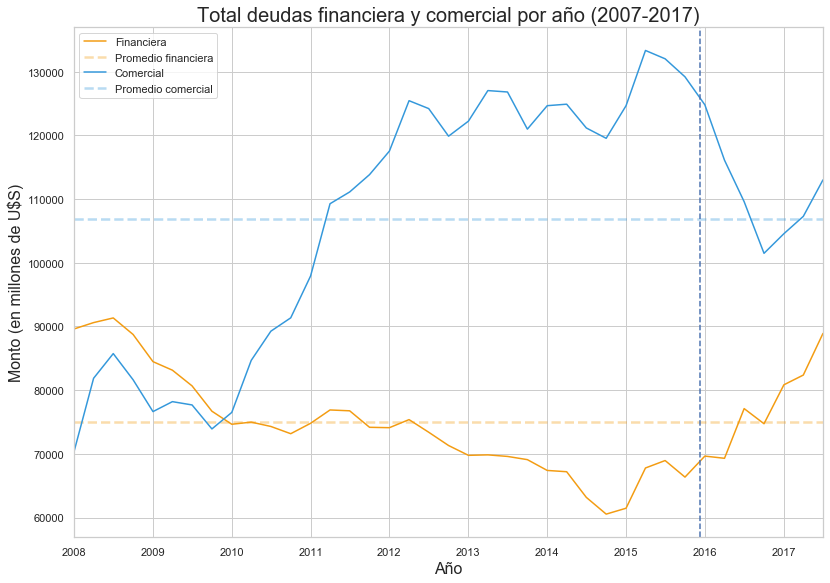

In [28]:
df['total_financiera_mean'] = df['total_financiera'].mean()
df['total_comercial_mean'] = df['total_comercial'].mean()

sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(11.69, 8.27))
plt.plot(df.index, df['total_financiera'], label='Financiera', color='#F39C12')
plt.plot(df.index, df['total_financiera_mean'], label='Promedio financiera', linestyle='--', alpha=0.35, linewidth=2.5, color='#F39C12')
plt.plot(df.index, df['total_comercial'], label='Comercial', color='#3498DB')
plt.plot(df.index, df['total_comercial_mean'], label='Promedio comercial', linestyle='--', alpha=0.35, linewidth=2.5, color='#3498DB')


plt.title('Total deudas financiera y comercial por año (2007-2017)', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Año', size=16)
plt.ylabel('Monto (en millones de U$S)', size=16)

plt.axvline(dt.datetime(2015, 12, 10), linestyle='--')

plt.legend()

plt.tight_layout()
plt.xlim('2008-01-01', '2017-07-01')

#plt.savefig('deudas_total.png')

plt.show()

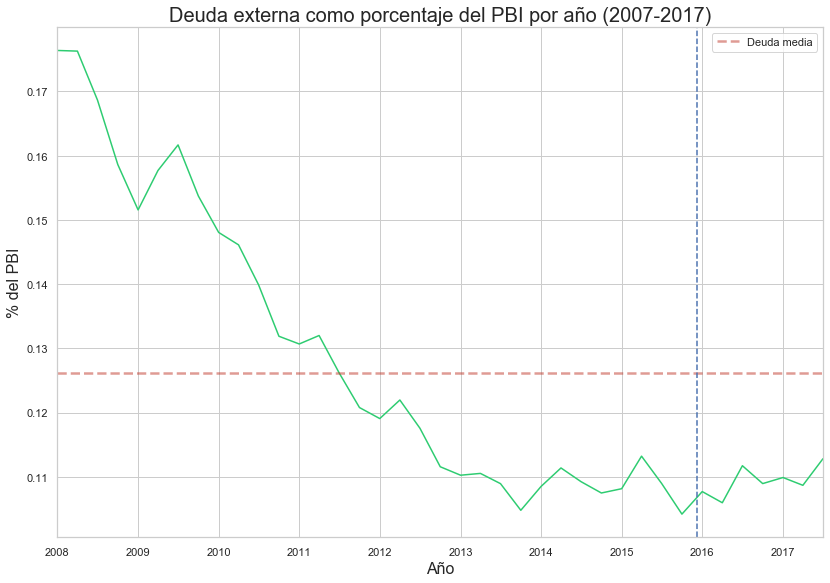

In [29]:
df['en_porcentaje_del_pib_mean'] = df['en_porcentaje_del_pib'].mean()

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(11.69, 8.27))
plt.plot(df.index, df['en_porcentaje_del_pib'], color='#2ECC71')
plt.plot(df.index, df['en_porcentaje_del_pib_mean'], color='#C0392B', alpha=0.5, linestyle='--', linewidth=2.5, label="Deuda media")

plt.title('Deuda externa como porcentaje del PBI por año (2007-2017)', fontdict={'fontsize': 20}, loc='center')
plt.xlabel('Año', size=16)
plt.ylabel('% del PBI', size=16)

plt.axvline(dt.datetime(2015, 12, 10), linestyle='--')

plt.legend()

plt.tight_layout()

plt.xlim('2008-01-01', '2017-07-01')

#plt.savefig('deudas_porcentaje_pbi.png')

plt.show()

### Algunas conclusiones

Existe un relato que, durante los gobiernos de Cristina Fernández de Kirchner, hubo un proceso de desendeudamiento, luego revertido por Mauricio Macri. Esto no se refleja necesariamente en términos nominales, dado que la deuda comercial sigue siendo elevada y creció significativamente. Pero la deuda financiera disminuyó, y la deuda total en términos de porcentaje del PBI también.

Otro relato indica que el gobierno de Mauricio Macri se caracterizó por la toma excesiva de deuda. Si bien únicamente tenemos los dos primeros años del gobierno de Macri para observar en nuestro dataset, podemos ver una tendencia creciente de los dos tipos de deuda desde finales de 2016, aunque no se vea reflejada en deuda como porcentaje del PBI.

Pero un dato que no llega a figurar en el dataset es que en 2018, ahorcado por los compromisos financieros ya tomados, las devaluaciones del peso y la falta de acreedores, el gobierno toma una deuda con el Fondo Monetario Internacional por 57.000 millones de dólares. De agregar esa deuda a lo ya incorporado al dataset, significaría un salto enorme en términos tanto nominales como porcentuales del PBI.